In [39]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

In [40]:
file_path = 'Month_Value_1.csv'

In [41]:
df = pd.read_csv(file_path)

In [42]:
df.isna().sum()

Period                                       0
Revenue                                     32
Sales_quantity                              32
Average_cost                                32
The_average_annual_payroll_of_the_region    32
dtype: int64

In [43]:
df.dropna(inplace=True)

In [44]:
data = pd.date_range(start='2015-01-01', end='2015-03-05', freq='D')
df['Data'] = data
df.set_index('Data', inplace=True)

In [45]:
media = df['Sales_quantity'].rolling(window=7, min_periods=2).mean()
desvio = df['Sales_quantity'].rolling(window=7, min_periods=2).std()

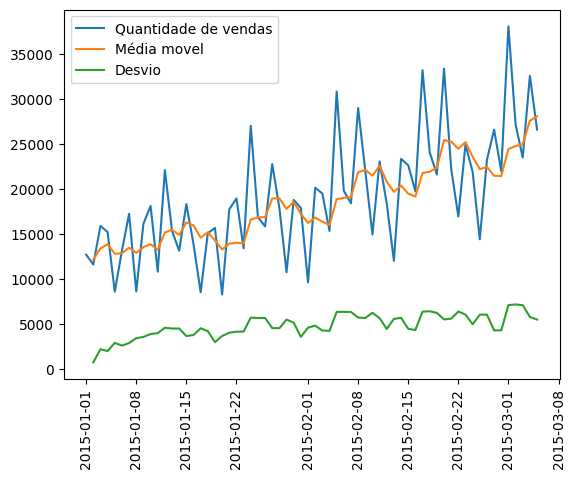

In [46]:
plt.plot(df['Sales_quantity'], label='Quantidade de vendas')
plt.plot(media, label='Média movel')
plt.plot(desvio, label='Desvio')
plt.xticks(rotation=90)
plt.legend(loc='best')
plt.show()

In [47]:
serie_casos = df
serie_casos

,Period,Revenue,Sales_quantity,Average_cost,The_average_annual_payroll_of_the_region
Data,,,,,
2015-01-01,01.01.2015,1.601007e+07,12729.0,1257.763541,30024676.0
2015-01-02,01.02.2015,1.580759e+07,11636.0,1358.507000,30024676.0
2015-01-03,01.03.2015,2.204715e+07,15922.0,1384.697024,30024676.0
2015-01-04,01.04.2015,1.881458e+07,15227.0,1235.606705,30024676.0
2015-01-05,01.05.2015,1.402148e+07,8620.0,1626.621765,30024676.0
...,...,...,...,...,...
2015-03-01,01.12.2019,5.875647e+07,38069.0,1543.420464,29878525.0
2015-03-02,01.01.2020,5.628830e+07,27184.0,2070.640850,29044998.0
2015-03-03,01.02.2020,4.022524e+07,23509.0,1711.057181,29044998.0


In [51]:
serie_casos['Period'] = pd.to_datetime(serie_casos['Period'])

max_2013 = serie_casos[serie_casos['Period'] < '2014-01-01']
max_2014 = serie_casos[(serie_casos['Period'] >= '2014-01-01') & (serie_casos['Period'] < '2015-01-01')]
max_2015 = serie_casos[(serie_casos['Period'] >= '2015-01-01') & (serie_casos['Period'] < '2016-01-01')]
max_2016 = serie_casos[(serie_casos['Period'] >= '2016-01-01') & (serie_casos['Period'] < '2017-01-01')]
max_2017 = serie_casos[(serie_casos['Period'] >= '2017-01-01') & (serie_casos['Period'] < '2018-01-01')]
max_2018 = serie_casos[(serie_casos['Period'] >= '2018-01-01') & (serie_casos['Period'] < '2019-01-01')]
max_2019 = serie_casos[(serie_casos['Period'] >= '2019-01-01') & (serie_casos['Period'] < '2020-01-01')]
max_2020 = serie_casos[(serie_casos['Period'] >= '2019-01-01') & (serie_casos['Period'] < '2020-01-01')]
max_2021 = serie_casos[(serie_casos['Period'] >= '2020-01-01') & (serie_casos['Period'] < '2021-01-01')]
print(max_2013.loc[max_2013['Sales_quantity'].idxmax()])
print(max_2014.loc[max_2014['Sales_quantity'].idxmax()])
print(max_2015.loc[max_2015['Sales_quantity'].idxmax()])
print(max_2016.loc[max_2016['Sales_quantity'].idxmax()])
print(max_2017.loc[max_2017['Sales_quantity'].idxmax()])
print(max_2018.loc[max_2018['Sales_quantity'].idxmax()])
print(max_2019.loc[max_2019['Sales_quantity'].idxmax()])
print(max_2020.loc[max_2020['Sales_quantity'].idxmax()])
print(max_2021.loc[max_2021['Sales_quantity'].idxmax()])
max_values = pd.concat([
    max_2013.loc[max_2013['Sales_quantity'].idxmax()],
    max_2014.loc[max_2014['Sales_quantity'].idxmax()],
    max_2015.loc[max_2015['Sales_quantity'].idxmax()],
    max_2016.loc[max_2016['Sales_quantity'].idxmax()],
    max_2017.loc[max_2017['Sales_quantity'].idxmax()],
    max_2018.loc[max_2018['Sales_quantity'].idxmax()],
    max_2019.loc[max_2019['Sales_quantity'].idxmax()],
    max_2020.loc[max_2020['Sales_quantity'].idxmax()],
    max_2021.loc[max_2021['Sales_quantity'].idxmax()]
])

print(max_values)

ValueError: attempt to get argmax of an empty sequence

In [10]:
serie_casos = serie_casos['Sales_quantity']

In [11]:
serie_casos.sort_index(inplace=True)

In [12]:
decomp = seasonal_decompose(serie_casos, model='additive', period=14)

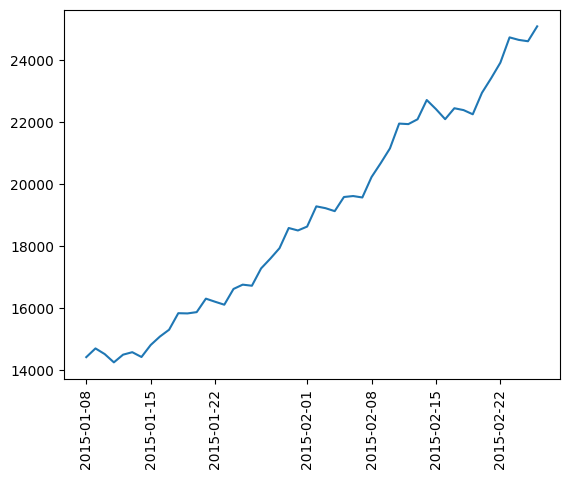

In [13]:
plt.plot(decomp.trend, label='casos')
plt.xticks(rotation=90)
plt.show()

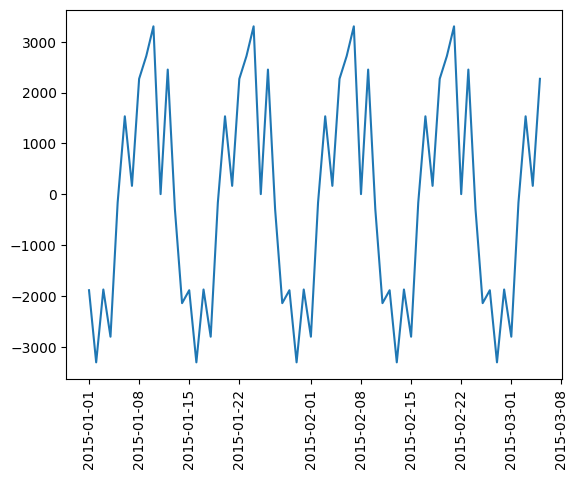

In [14]:
plt.plot(decomp.seasonal, label='casos')
plt.xticks(rotation=90)
plt.show()

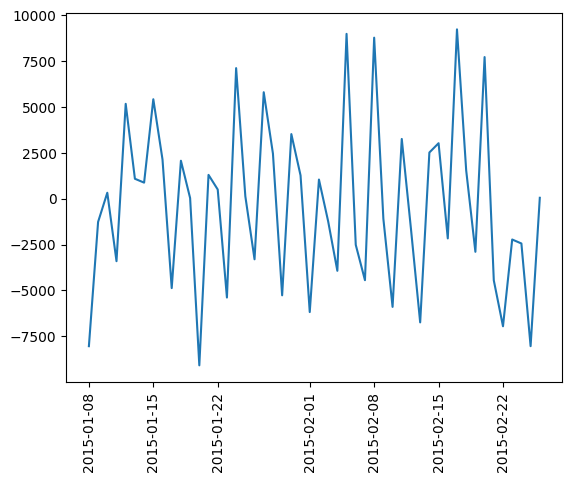

In [15]:
plt.plot(decomp.resid, label='casos')
plt.xticks(rotation=90)
plt.show()

Augmented Dickey-Fuller

In [16]:
from statsmodels.tsa.stattools import adfuller
adftest = adfuller(df['Sales_quantity'])

out = pd.Series(adftest[0:4], index=['Teste','p-valor','Lags','Número de observações usadas'])
for key,value in adftest[4].items():
    out['Valor crítico (%s)'%key] = value
print(out)


Teste                            1.157056
p-valor                          0.995675
Lags                            11.000000
Número de observações usadas    52.000000
Valor crítico (1%)              -3.562879
Valor crítico (5%)              -2.918973
Valor crítico (10%)             -2.597393
dtype: float64


In [17]:
import statsmodels.api as sm

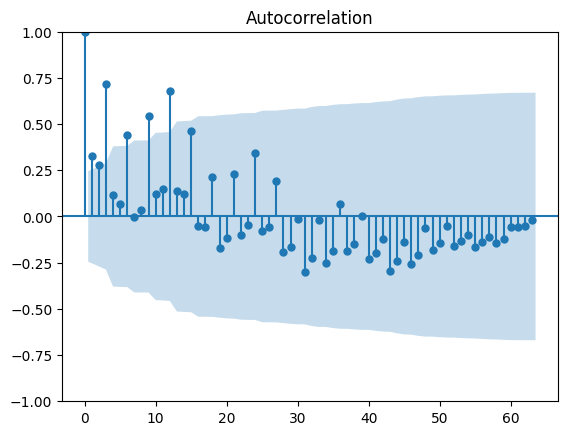

In [18]:
sm.graphics.tsa.plot_acf(df[['Sales_quantity']], lags=63)
plt.show()